# <span style="color:#F72585"><center>Isomap: Reducción de Dimensión No Lineal Usando Geodésicas</center></span>



<figure>
<center>
<img src="../Imagenes/Sand_ring.jpg" width="600" height="400" align="center" /> 
</center>   
</figure>

Fuente: <a href="https://commons.wikimedia.org/wiki/File:Sand_ring.jpg#/media/File:Sand_ring.jpg">Athanasios Lampridis</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0" title="Creative Commons Attribution-Share Alike 4.0">CC BY-SA 4.0</a>, , via Wikimedia Commons


## <span style="color:#4361EE">Referencias</span>

1. John A. Lee and Michel Verleysen. *Nonlinear dimensionality reduction*. Springer, first edition, 2007.
2. Christopher J. C. Burges, *Dimension Reduction: A Guided Tour*, Foundations and Trends in Machine Learning, Vol. 2, No. 4 (2009) 275–365.
3. [Vinayak Sharma, Decomposing Non-linearity with ISOMAP](https://towardsdatascience.com/decomposing-non-linearity-with-isomap-32cf1e95a483)

## <span style="color:#4361EE">Introducción</span>

<h3> Distancias geodésicas y gráficas</h3>
En pocas palabras, las distancias gráficas intentan superar algunas deficiencias de las métricas espaciales como la distancia euclidiana.

La siguiente subsección presenta las distancias geodésicas y gráficas, explica cómo se relacionan entre sí y motiva su uso en el contexto de la reducción de la dimensionalidad.

<h3> Distancia geodésica</h3>

La distancia a lo largo de una variedad suele llamarse **distancia geodésica**, por analogía con las curvas dibujadas en la superficie de la Tierra.

La distancia geodésica también se puede interpretar como una distancia ferroviaria: los trenes están obligados a seguir la vía (la variedad).

Por otra parte, las distancias euclidianas pueden seguir atajos directos, como un avión que vuela independientemente de las carreteras y las pistas.

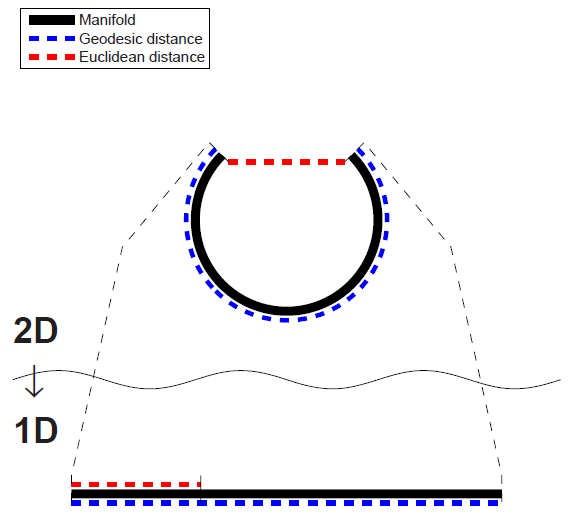

In [1]:
from IPython.display import Image
Image(filename="../Imagenes/geodesic_euclidean_dist.png")

La curva $C$ es una variedad única incrustada en un espacio bidimensional.
Intuitivamente, se espera que la reducción a una dimensión desenrolle la curva y la haga recta. Con esta idea en mente, la distancia euclidiana no puede conservarse fácilmente, excepto para distancias muy pequeñas, en una escala tan pequeña que la variedad es casi lineal.

Para reducir la dimensionalidad a 1, se espera intuitivamente que la curva tenga que ser desenrollada. Suponiendo que se conservan distancias euclidianas muy cortas, esto significa, como contrapartida, que las distancias euclidianas más largas se estiran considerablemente.

Formalmente, la distancia geodésica es bastante complicada de calcular a partir de la expresión analítica de una variedad. Por ejemplo, en el caso de una variedad unidimensional M, que depende de una sola variable latente $x$, como la curva $C$, las ecuaciones paramétricas se pueden escribir como

$$
\mathbb{R}\to \mathcal{M}\subset \mathbb{R}^D: x \to m(x) = [m_1(x), \ldots, m_D(x)]^T
$$

y puede ayudar a calcular la distancia múltiple como una longitud de arco. De hecho, la longitud del arco $l$ desde el punto $y(i) = m(x(i))$ al punto $y(j) = m(x(j))$ se calcula como la integral

$$ 
l = \int_{y(i)}^{ y(j)}dl =  \int_{y(i)}^{ y(j)}\sqrt{\sum_{k=1}^D dm_i} =  \int_{x(i)}^{ x(j)} ||J_x(m(x) ||dx
$$
donde $J_x m(x)$ designa la matriz Jacobiana de m con respecto al parámetro
$x$.

Desafortunadamente, la situación empeora para las variedades multidimensionales, que involucran más de un parámetro.

In this case, several different paths may go from point $y(i)$ to point $y(j)$. Each of these paths is in fact a one-dimensional submanifold $\mathcal{P}$ of $\mathcal{M}$

The integral then has to be minimized over all possible paths that connect the starting and ending points:
$$ 
l = \underset{p(z)}{\min} \int_{z(i)}^{z(j)} ||J_z(m(p(z)) ||dz
$$

In practice, this minimization is intractable.

<h3> Aproximación por Grafos</h3>

Para obtener una buena aproximación de la verdadera longitud del arco, se necesita una discretización fina de la variedad. Por lo tanto, solo se permitirán los saltos más pequeños. En la práctica, varias reglas simples pueden lograr este objetivo.

Un primer ejemplo es la regla **$K$**, que permite saltar de un punto a los $K$ más cercanos, siendo $K$ una constante.

Un segundo ejemplo es la regla **$\epsilon$**, que permite saltar de un punto a todos los demás que se encuentran dentro de una bola con un radio predeterminado.

Formalmente, el conjunto de puntos de datos asociados con el conjunto de saltos permitidos constituye un grafo en el sentido matemático del término.

Los bordes se codifican como pares de vértices. Si las aristas son pares ordenados, se dice que el grafo es dirigido; de lo contrario, no está dirigido. En el presente caso, el grafo está etiquetado con vértices, es decir, existe una correspondencia biunívoca entre los $N$ vértices y los $N$ puntos de datos $y(i): label(v_i) = y(i)$. Para calcular la longitud de los caminos, el gráfico debe estar etiquetado con vértices y bordes, lo que significa que, en el presente caso, a los bordes se les da una longitud. Como la longitud es un atributo numérico, se dice que el grafo tiene ponderación (de borde) si la longitud de la arista es su longitud euclidiana y

$$
\text{label} ((v_i,v_j)) = ||y(i)-y(j)||_2.
$$

En la teoría de grafos, las longitudes de los caminos más cortos se denominan tradicionalmente **distancias gráficas** y el algoritmo de Dijkstra se usa para calcular distancias mínimas entre los puntos del grafo.

<h3> Teorema</h3> 
La distancia gráfica se aproxima a la distancia geodésica real de manera adecuada.

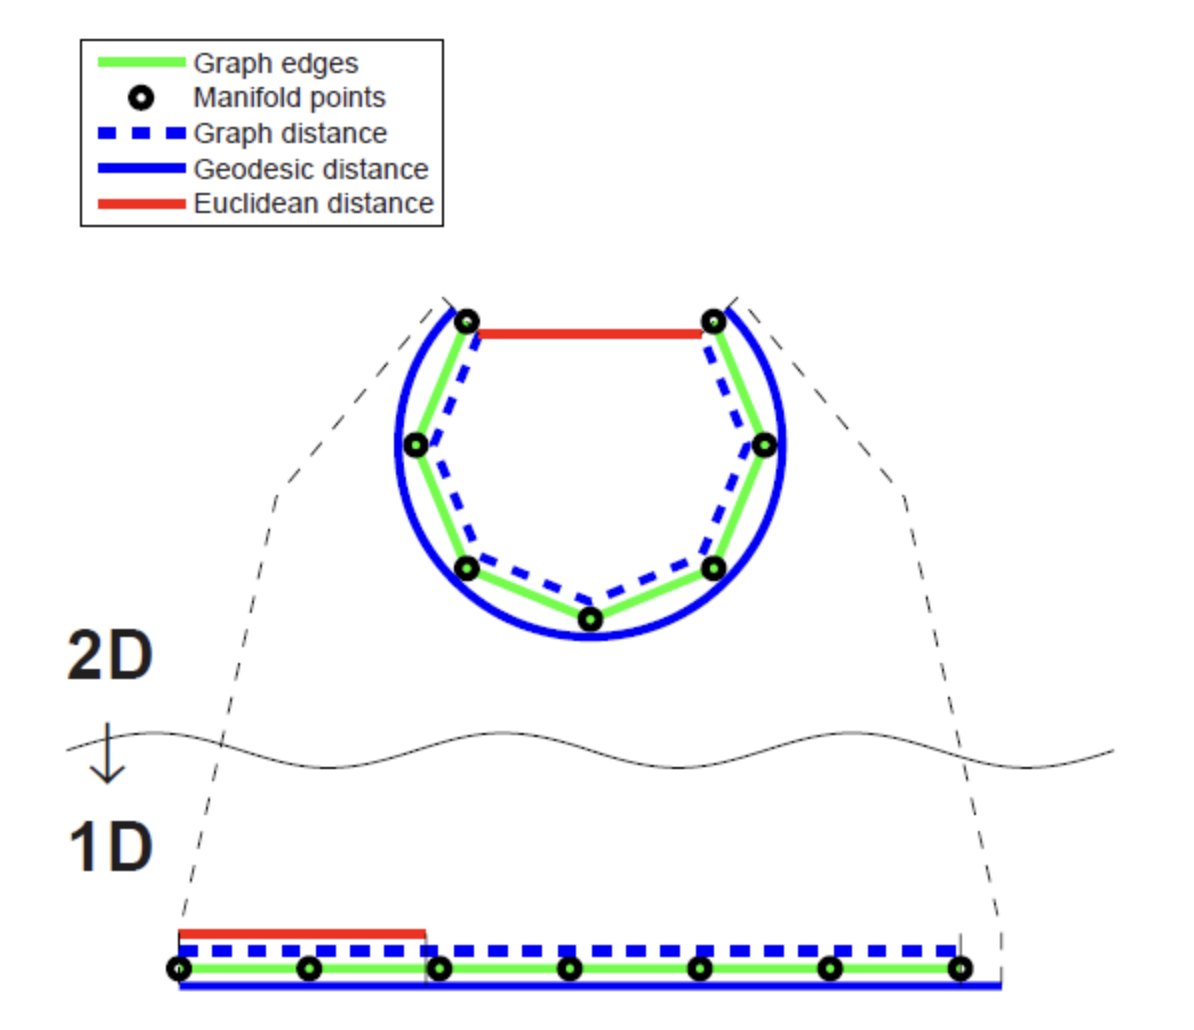

In [2]:
from IPython.display import Image
Image(filename="../Imagenes/graph_geodesic.png")

## <span style="color:#4361EE">Isomap</span>

Isomap funciona en los siguientes pasos:

1. Cree un gráfico con la regla $K$ o la regla $\epsilon$.
2. Pondera el gráfico etiquetando cada borde con su longitud euclidiana.
3. Calcule todas las distancias gráficas por pares con el algoritmo de Dijkstra, elévelas al cuadrado y guárdelas en la matriz $D$.
4. Convertir la matriz de distancias $D$ en una matriz de Gram $S$ mediante doble centrado.
5. Una vez conocida la matriz de Gram, calcular su descomposición espectral $S = U\Lambda U^T$ .
6. Una representación $P$-dimensional de $Y$ se obtiene calculando el producto
$$
\hat{X} = I_{P\times N}\Lambda^{1/2}U^T.
$$


Por lo tanto, se aplica el escalado multidimensional en el gráfico de distancia y se conserva la geometría, luego se optimizan las posiciones de los puntos.

Probaremos estos algoritmos en conjuntos de datos **S** no lineales generados por sklearn.

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.manifold import Isomap
from sklearn import datasets
n_points = 2000
# S dataset
X, color = datasets.make_s_curve(n_points, random_state=0)

Visualización de los datos

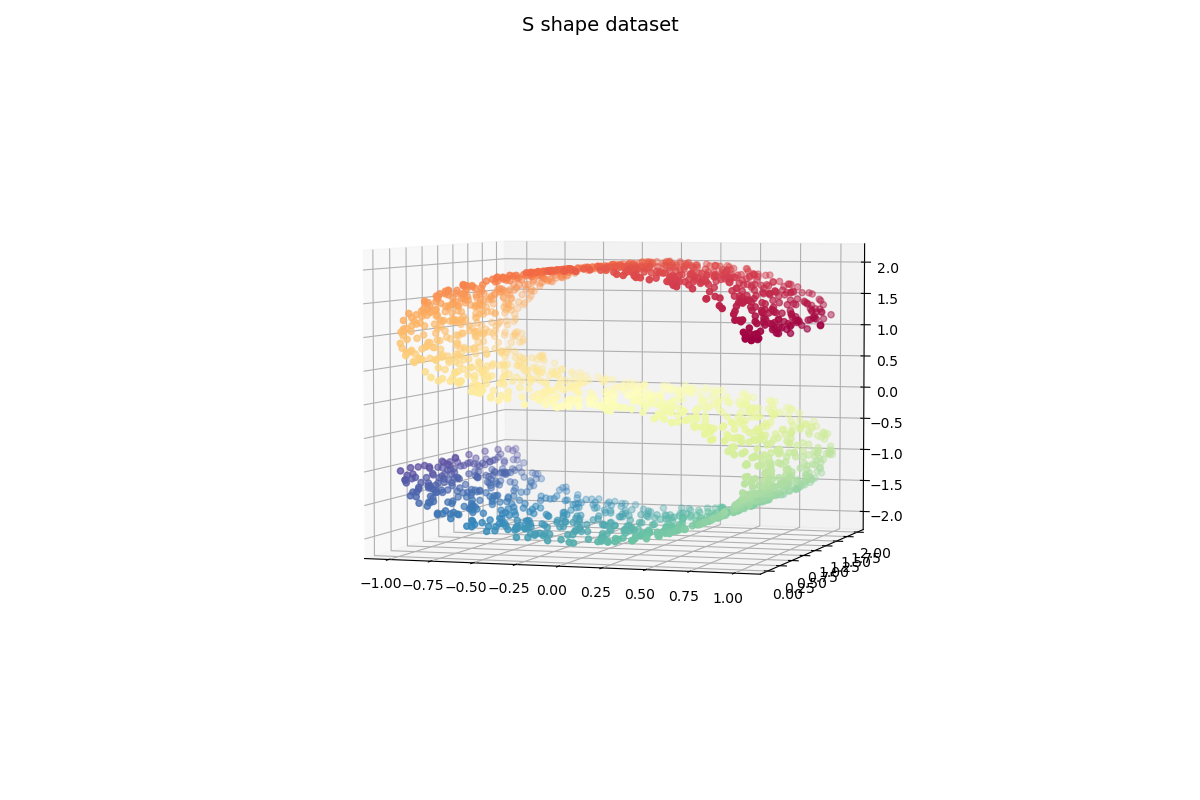

In [2]:
%matplotlib widget
#fig, ax = plt.subplots(1,1,figsize=(12, 8))
fig = plt.figure(figsize=(12, 8))
plt.suptitle("S shape dataset", fontsize=14)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

Now we apply PCA on the above dataset.

In [3]:
print(X)

[[ 4.43998676e-01  1.62303694e+00 -1.03972559e-01]
 [ 8.97240971e-01  9.52167972e-01 -1.44154121e+00]
 [ 8.24049301e-01  1.04631198e+00 -4.33481907e-01]
 ...
 [-1.86383157e-01  1.66000589e+00  1.75228660e-02]
 [ 9.76995650e-01  1.86561236e+00 -7.86740770e-01]
 [ 1.67105853e-02  6.16676869e-01 -1.39631579e-04]]


In [4]:
print(color[0:5])

[ 0.46005644  2.028112    0.968522    0.42301403 -0.71953656]


In [5]:
len(color)

2000

In [6]:
len(X)

2000

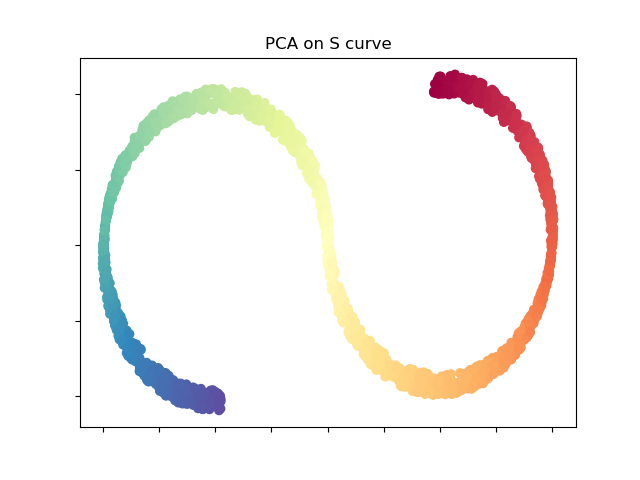

In [7]:
n_components = 2
from sklearn.decomposition import PCA
Y = PCA(n_components).fit_transform(X)
fig, ax = plt.subplots(1,1)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("PCA on S curve")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.show()

Veamos los resultados con Isomap

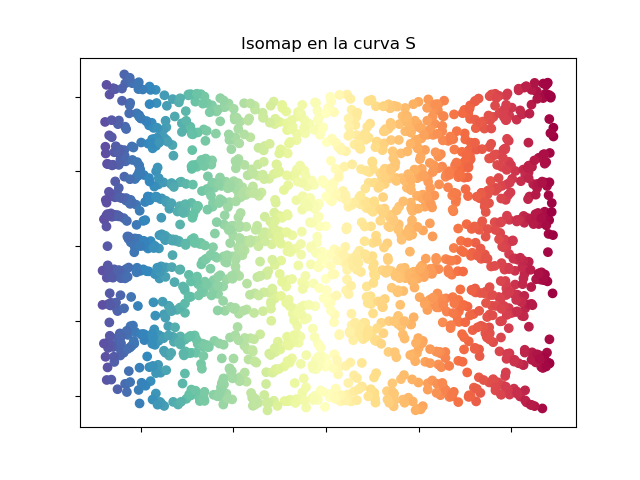

In [8]:
n_components = 2
n_neighbors = 10

Y = Isomap(n_neighbors=n_neighbors, n_components=n_components).fit_transform(X)
fig, ax = plt.subplots(1,1)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap en la curva S")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.show()

## <span style="color:#4361EE">Aplicación: Dígitos Escritos a Mano</span>

In [9]:
import pandas as pd # for data manipulation

# Visualization
import plotly.express as px # for data visualization
import matplotlib.pyplot as plt # for showing handwritten digits

# Sklearn
from sklearn.datasets import load_digits # for MNIST data
from sklearn.manifold import Isomap # for Isomap dimensionality reduction

In [10]:
# Load digits data 
digits = load_digits()

# Load arrays containing digit data (64 pixels per image) and their true labels
X, y = load_digits(return_X_y=True)

# Some stats
print('Shape of digit images: ', digits.images.shape)
print('Shape of X (training data): ', X.shape)
print('Shape of y (true labels): ', y.shape)

Shape of digit images:  (1797, 8, 8)
Shape of X (training data):  (1797, 64)
Shape of y (true labels):  (1797,)


In [11]:
import numpy as np

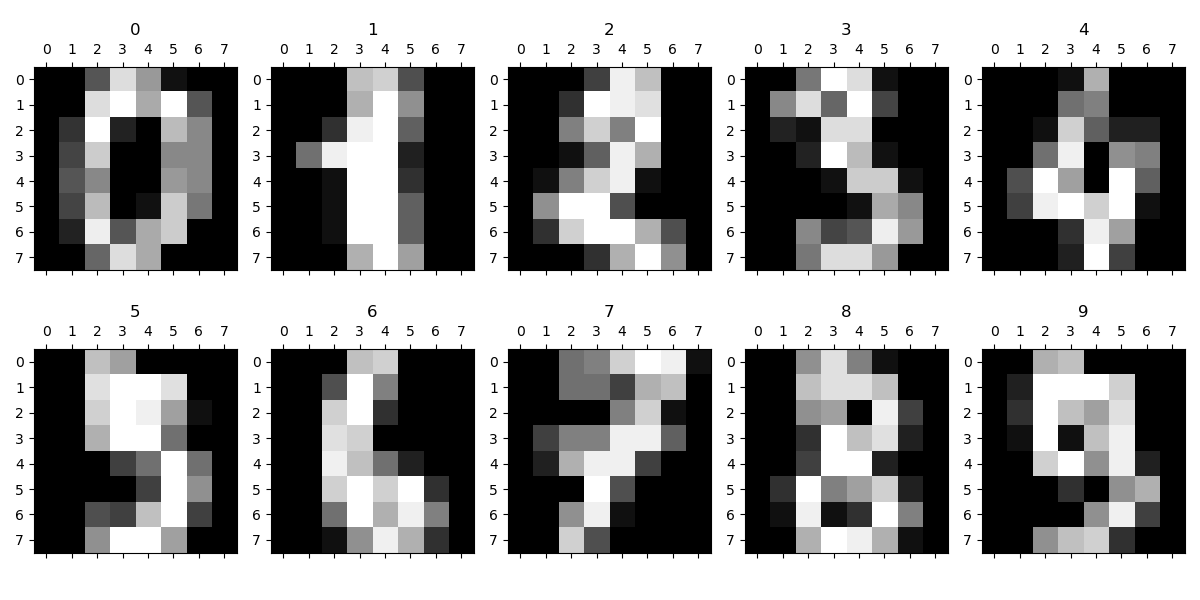

In [12]:

# Display images of the first 10 digits
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
plt.gray() 
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(digits.images[n])
        axs[i,j].set(title=y[n])
        n=n+1
plt.show() 

In [13]:
### Step 1 - Configure the Isomap function, note we use default hyperparameter values in this example
embed3 = Isomap(
    n_neighbors=10, # default=5, algorithm finds local structures based on the nearest neighbors
    n_components=3, # number of dimensions
    eigen_solver='auto', # {‘auto’, ‘arpack’, ‘dense’}, default=’auto’
    tol=0, # default=0, Convergence tolerance passed to arpack or lobpcg. not used if eigen_solver == ‘dense’.
    max_iter=None, # default=None, Maximum number of iterations for the arpack solver. not used if eigen_solver == ‘dense’.
    path_method='auto', # {‘auto’, ‘FW’, ‘D’}, default=’auto’, Method to use in finding shortest path.
    neighbors_algorithm='auto', # neighbors_algorithm{‘auto’, ‘brute’, ‘kd_tree’, ‘ball_tree’}, default=’auto’
    n_jobs=-1, # n_jobsint or None, default=None, The number of parallel jobs to run. -1 means using all processors
    metric='minkowski', # string, or callable, default=”minkowski”
    p=2, # default=2, Parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2
    metric_params=None # default=None, Additional keyword arguments for the metric function.
)

### Step 2 - Fit the data and transform it, so we have 3 dimensions instead of 64
X_trans3 = embed3.fit_transform(X)
    
### Step 3 - Print shape to test
print('The new shape of X: ',X_trans3.shape)

The new shape of X:  (1797, 3)


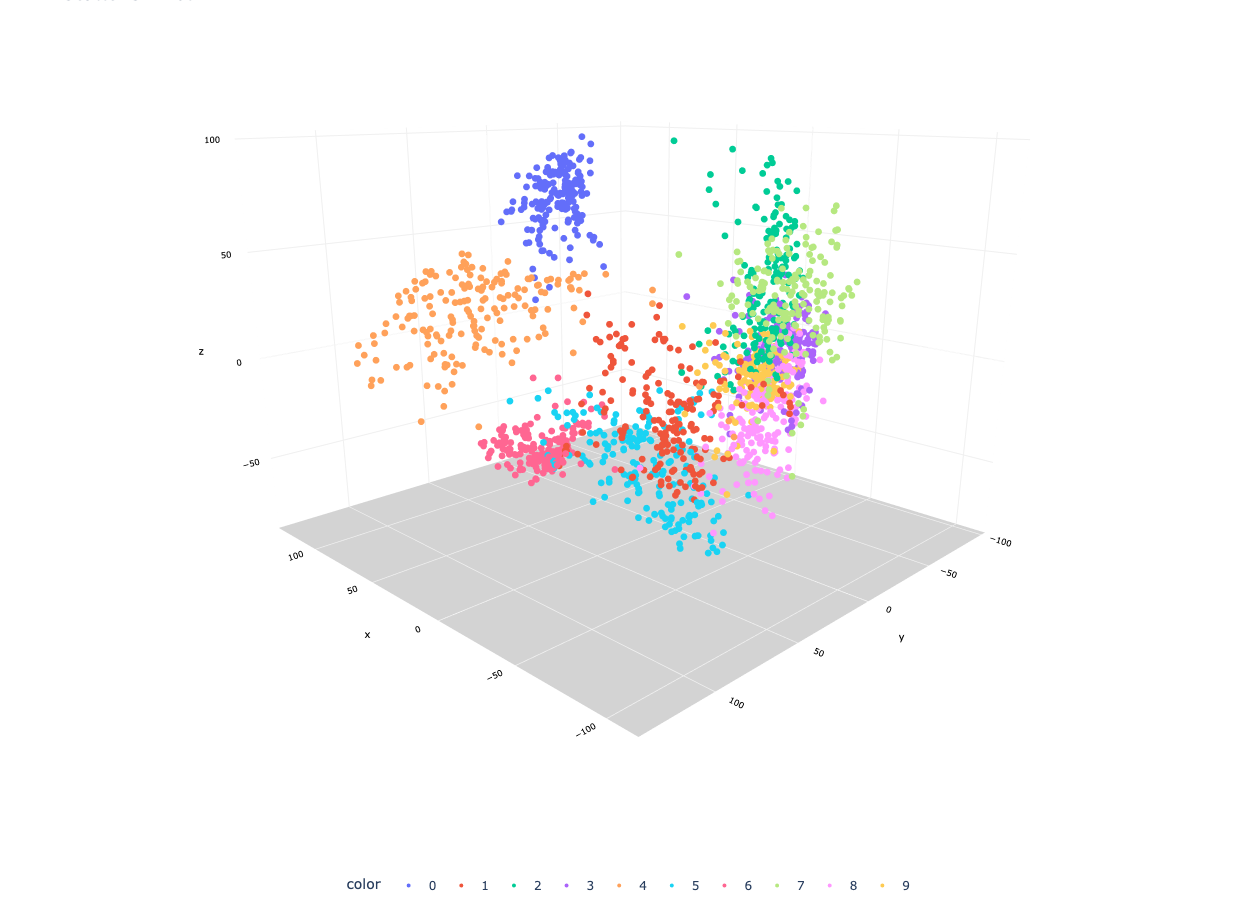

In [23]:
# Create a 3D scatter plot
fig = px.scatter_3d(None, 
                    x=X_trans3[:,0], y=X_trans3[:,1], z=X_trans3[:,2],
                    color=y.astype(str),
                    height=900, width=900
                   )

# Update chart looks
fig.update_layout(title_text="Scatter 3D Plot",
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=-1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))

# Update marker size
fig.update_traces(marker=dict(size=4))

fig.show()

### <span style="color:red">**Tarea**</span>

Repetir el ejercicio con los datasets MNIST (784 dimensiones) y MNIST Fashion.